In [2]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
import pickle

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV


In [3]:
df = pd.read_csv("house_prices_with_distances_processed.csv",index_col=0)

C:\Users\PC\AppData\Local\Temp\ipykernel_8620\3580269834.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


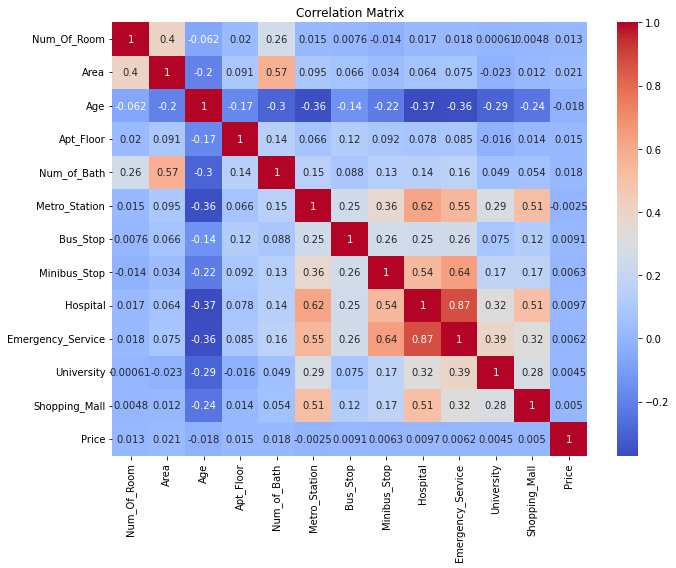

In [4]:
# Assuming your dataset is stored in a DataFrame called 'data'
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation Matrix')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
df.dtypes

District              object
Neighborhood          object
Num_Of_Room            int64
Area                 float64
Age                  float64
Heat_type             object
Apt_Floor            float64
Credit_Eli            object
Items                 object
Num_of_Bath          float64
Metro_Station        float64
Bus_Stop             float64
Minibus_Stop         float64
Hospital             float64
Emergency_Service    float64
University           float64
Shopping_Mall        float64
Floor                 object
Price                float64
dtype: object

array([[<AxesSubplot:title={'center':'Num_Of_Room'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Apt_Floor'}>],
       [<AxesSubplot:title={'center':'Num_of_Bath'}>,
        <AxesSubplot:title={'center':'Metro_Station'}>,
        <AxesSubplot:title={'center':'Bus_Stop'}>,
        <AxesSubplot:title={'center':'Minibus_Stop'}>],
       [<AxesSubplot:title={'center':'Hospital'}>,
        <AxesSubplot:title={'center':'Emergency_Service'}>,
        <AxesSubplot:title={'center':'University'}>,
        <AxesSubplot:title={'center':'Shopping_Mall'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

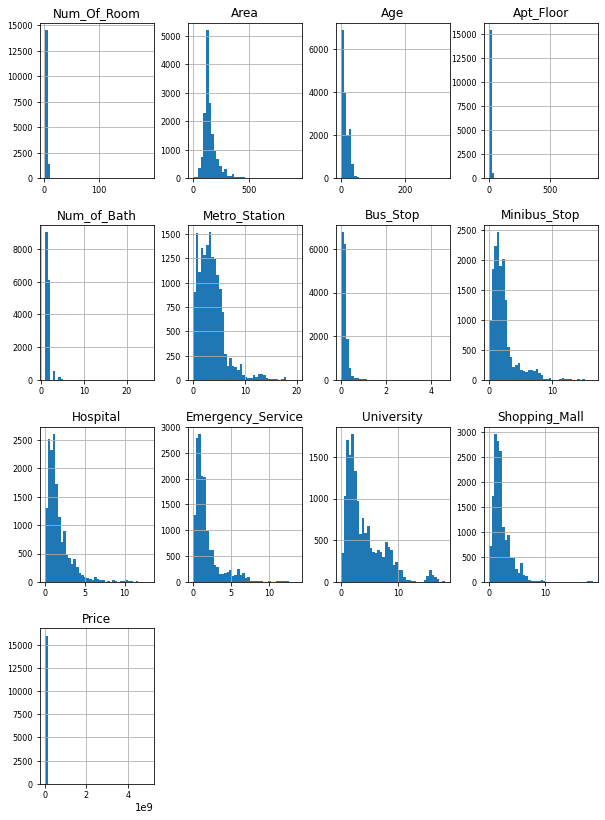

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(10, 14), bins=40, xlabelsize=8, ylabelsize=8)

In [7]:
categorical_columns = ["District",'Neighborhood',"Heat_type","Floor","Items","Credit_Eli"]

In [8]:
X = df.drop(columns=["Price"])

Y = df["Price"].values

In [9]:

Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (Y > lower_bound) & (Y < upper_bound)


df_filtered = df[mask]

array([[<AxesSubplot:title={'center':'Num_Of_Room'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Apt_Floor'}>],
       [<AxesSubplot:title={'center':'Num_of_Bath'}>,
        <AxesSubplot:title={'center':'Metro_Station'}>,
        <AxesSubplot:title={'center':'Bus_Stop'}>,
        <AxesSubplot:title={'center':'Minibus_Stop'}>],
       [<AxesSubplot:title={'center':'Hospital'}>,
        <AxesSubplot:title={'center':'Emergency_Service'}>,
        <AxesSubplot:title={'center':'University'}>,
        <AxesSubplot:title={'center':'Shopping_Mall'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

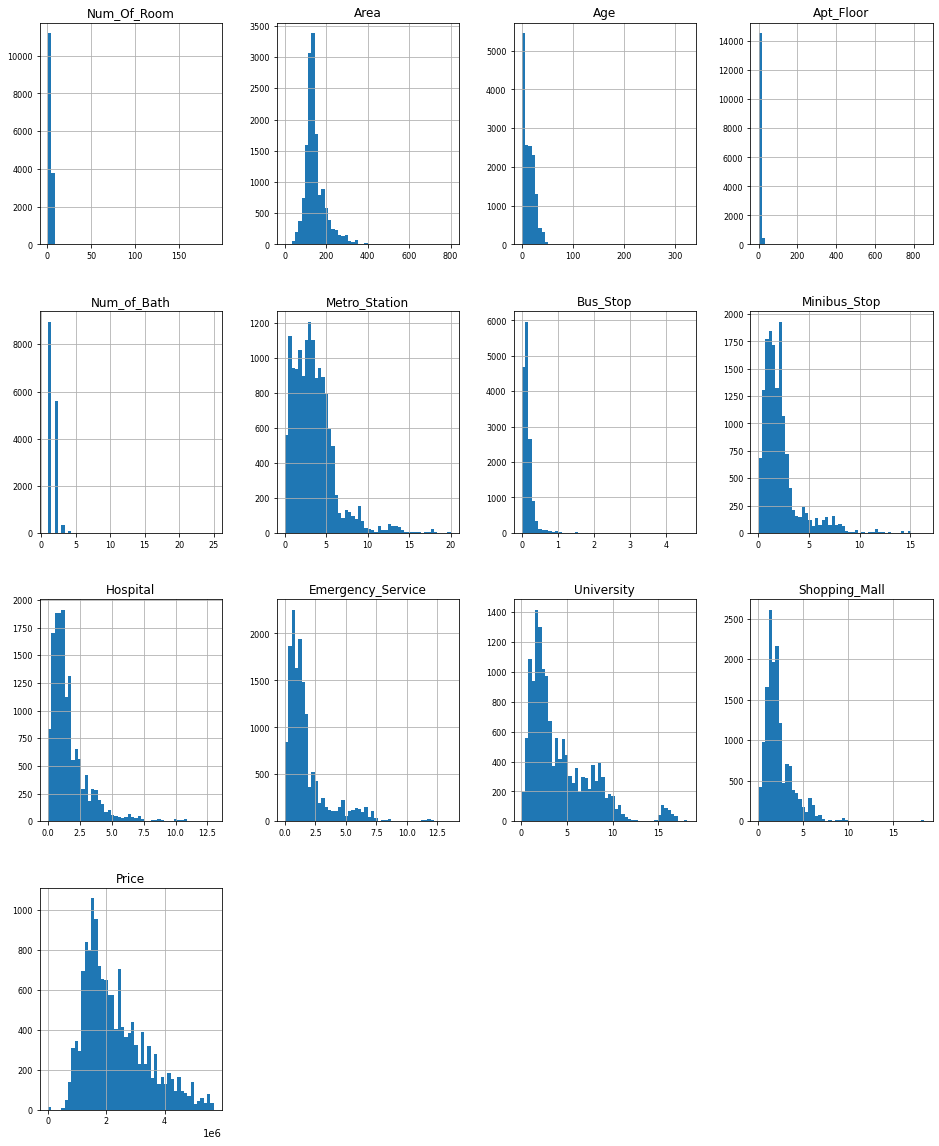

In [10]:
df_num = df_filtered.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
X = df_filtered.drop(columns=["Price"])

Y = df_filtered["Price"].values

In [12]:
encoder = ce.TargetEncoder(cols = categorical_columns)

In [13]:
encoder.fit(X,Y)

TargetEncoder(cols=['District', 'Neighborhood', 'Heat_type', 'Floor', 'Items',
                    'Credit_Eli'])

In [14]:
X_encoded = encoder.fit_transform(X,Y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.values, Y, test_size=0.1, random_state=42)

In [16]:



catboost = CatBoostRegressor()


param_grid = {
    'iterations': [4000],
    'learning_rate': [ 0.01],
    'depth': [10,11],
    'l2_leaf_reg': [ 0.2],
    'border_count': [20],
    'early_stopping_rounds': [10],
    'bagging_temperature': [1],
    'random_strength': [0.8]
}


grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=2
)


grid_search.fit(X_train, y_train,verbose = False)


test_importance_model = grid_search.best_estimator_

y_pred_train = test_importance_model.predict(X_train)
y_pred_test = test_importance_model.predict(X_test)




Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END bagging_temperature=1, border_count=20, depth=10, early_stopping_rounds=10, iterations=4000, l2_leaf_reg=0.2, learning_rate=0.01, random_strength=0.8; total time=  11.0s
[CV] END bagging_temperature=1, border_count=20, depth=10, early_stopping_rounds=10, iterations=4000, l2_leaf_reg=0.2, learning_rate=0.01, random_strength=0.8; total time=  11.0s
[CV] END bagging_temperature=1, border_count=20, depth=11, early_stopping_rounds=10, iterations=4000, l2_leaf_reg=0.2, learning_rate=0.01, random_strength=0.8; total time=  16.7s
[CV] END bagging_temperature=1, border_count=20, depth=11, early_stopping_rounds=10, iterations=4000, l2_leaf_reg=0.2, learning_rate=0.01, random_strength=0.8; total time=  16.1s


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
msle = mean_squared_log_error(y_test,y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [19]:

# Define the performance data
performance_data = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Squared Log Error (MSLE)', 'Mean Absolute Percentage Error (MAPE)', 'R-squared'],
    'Value': [mae, mse, rmse, msle, mape, r2]
}

# Create a DataFrame from the performance data
performance_df = pd.DataFrame(performance_data)

# Print the performance DataFrame
print(performance_df)

                                  Metric         Value
0              Mean Absolute Error (MAE)  2.465111e+05
1               Mean Squared Error (MSE)  1.425918e+11
2         Root Mean Squared Error (RMSE)  3.776132e+05
3          Mean Squared Log Error (MSLE)  1.209475e-01
4  Mean Absolute Percentage Error (MAPE)  2.308685e+00
5                              R-squared  8.794781e-01


In [18]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"R2 score: {r2}")

R2 score: 0.8794781251803033


In [20]:
print(grid_search.best_params_)

{'bagging_temperature': 1, 'border_count': 20, 'depth': 10, 'early_stopping_rounds': 10, 'iterations': 4000, 'l2_leaf_reg': 0.2, 'learning_rate': 0.01, 'random_strength': 0.8}


In [21]:

# Get feature importance scores
importance_scores = test_importance_model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

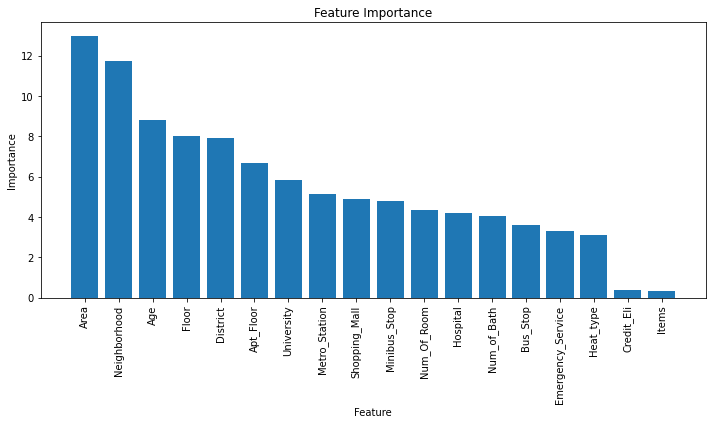

In [22]:
plt.figure(figsize=(10, 6))
# Create a bar plot of the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

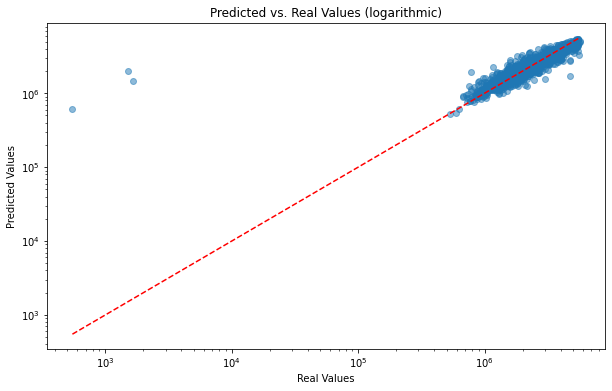

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Real Values (logarithmic)")


plt.xscale("log")
plt.yscale("log")


min_value = min(min(y_test), min(y_pred_test))
max_value = max(max(y_test), max(y_pred_test))
plt.plot([min_value, max_value], [min_value, max_value], color="red", linestyle="--")

plt.show()

In [24]:
categorical_columns_for_gui = ["District",'Neighborhood',"Heat_type","Floor"]
X_gui = df_filtered.drop(columns=["Price","Credit_Eli","Emergency_Service","Bus_Stop","Hospital","Items","Minibus_Stop"])
Y_gui = df_filtered["Price"].values
encoder_gui = ce.TargetEncoder(cols = categorical_columns_for_gui)
encoder_gui.fit(X_gui,Y_gui)
X_encodegui = encoder_gui.fit_transform(X_gui,Y_gui)

X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_encodegui.values, Y_gui, test_size=0.1, random_state=42)

In [25]:
params = {
    'iterations': 3000,
    'learning_rate': 0.05,
    'depth': 10,
    'l2_leaf_reg': 0.2,
    'border_count': 20,
    'early_stopping_rounds': 10,
    'bagging_temperature': 1,
    'random_strength': 0.8
}

model_for_gui = CatBoostRegressor(**params)
model_for_gui.set_params(iterations=4000)

model_for_gui.fit(X_train_G, y_train_G,verbose = False)

y_pred_test_G = model_for_gui.predict(X_test_G)

In [26]:

mse_test = mean_squared_error(y_test_G, y_pred_test_G)
r2_G = r2_score(y_test_G, y_pred_test)

print(f" R2 score: {r2_G}  mse : {mse_test}")

 R2 score: 0.8794781251803033  mse : 143839963708.628


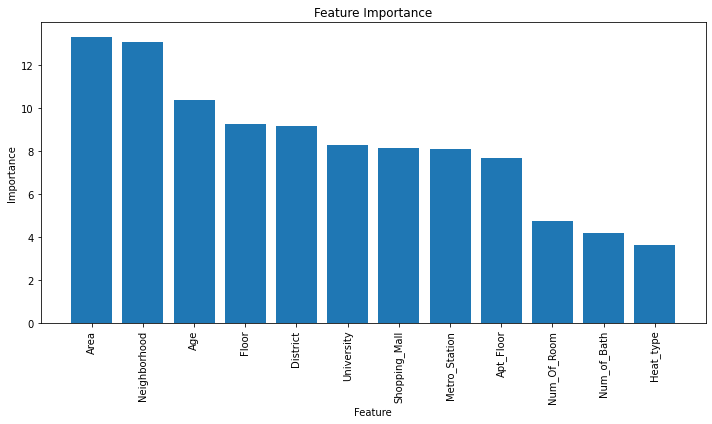

In [27]:

# Get feature importance scores
importance_scores = model_for_gui.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': X_gui.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
# Create a bar plot of the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
model_for_gui.save_model('catboost_model.bin')

In [ ]:
# Save the category encoder
with open('category_encoder.pkl', 'wb') as file:
    pickle.dump(encoder_gui, file)

In [40]:
model = CatBoostRegressor()
model.load_model("catboost_model.bin")

In [41]:


y_pred_test_G = model.predict(X_test_G)

In [43]:
mse_test = mean_squared_error(y_test_G, y_pred_test_G)
r2_G = r2_score(y_test_G, y_pred_test_G)

print(f" R2 score: {r2_G}  mse : {mse_test}")

 R2 score: 0.8784231070613787  mse : 143839963708.628


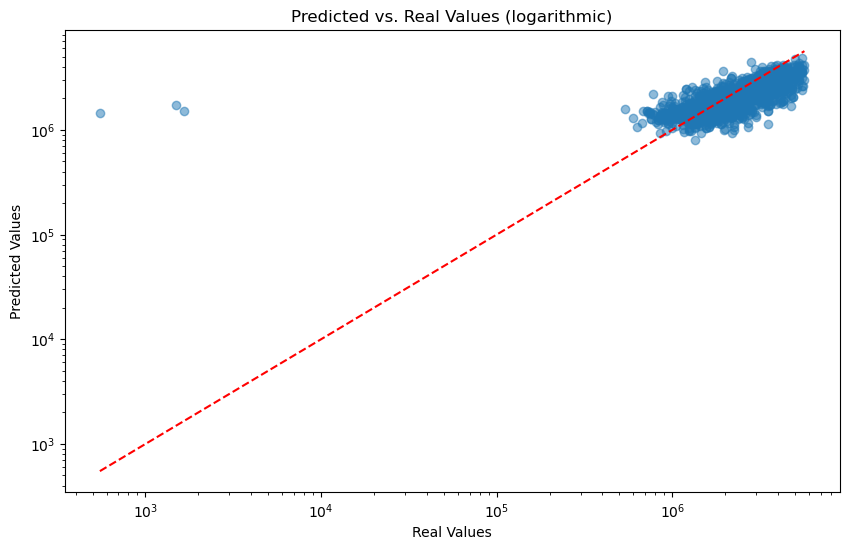

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Real Values (logarithmic)")


plt.xscale("log")
plt.yscale("log")


min_value = min(min(y_test), min(y_pred_test))
max_value = max(max(y_test), max(y_pred_test))
plt.plot([min_value, max_value], [min_value, max_value], color="red", linestyle="--")

plt.show()